# Capstone 3: Data Wrangling and EDA

## Data Wrangling

### Load and inspect the data

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in data
df = pd.read_csv('../data/raw/caravan-insurance-challenge.csv')

In [3]:
# Check dimesions of the data
df.shape

(9822, 87)

In [4]:
# Examine the first few rows of the dataframe.
pd.set_option('display.max_columns', None)
df.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [5]:
# Check data types of each column, and do an initial check for missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 87 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ORIGIN    9822 non-null   object
 1   MOSTYPE   9822 non-null   int64 
 2   MAANTHUI  9822 non-null   int64 
 3   MGEMOMV   9822 non-null   int64 
 4   MGEMLEEF  9822 non-null   int64 
 5   MOSHOOFD  9822 non-null   int64 
 6   MGODRK    9822 non-null   int64 
 7   MGODPR    9822 non-null   int64 
 8   MGODOV    9822 non-null   int64 
 9   MGODGE    9822 non-null   int64 
 10  MRELGE    9822 non-null   int64 
 11  MRELSA    9822 non-null   int64 
 12  MRELOV    9822 non-null   int64 
 13  MFALLEEN  9822 non-null   int64 
 14  MFGEKIND  9822 non-null   int64 
 15  MFWEKIND  9822 non-null   int64 
 16  MOPLHOOG  9822 non-null   int64 
 17  MOPLMIDD  9822 non-null   int64 
 18  MOPLLAAG  9822 non-null   int64 
 19  MBERHOOG  9822 non-null   int64 
 20  MBERZELF  9822 non-null   int64 
 21  MBERBOER  9822

It appears that all of our columns are stored as integers, except for ORIGIN. We note that these columns are actually categorical. However, the encoding as integers may be useful later on, so we leave them encoded that way for now. 

According to the codebook the ORIGIN column is only relevant to a specific Kaggle competition. We drop this column.

In [6]:
# Drop the 'origin' column.
df = df.drop('ORIGIN', axis=1)

### Check for missing values

In [7]:
# Confirm there are no null values.
print("This data set contains {} values coded as None or NaN.".format(sum(df.isna().any())))

This data set contains 0 values coded as None or NaN.


It's possible that there are some missing values, which happen to be coded as something other than `None` or `NaN`. We will return to this problem later, when we check for values not in the codebook.

### Check for duplicate rows

In [8]:
print('This data set has {} rows which are duplicates.'.format(df.duplicated().sum()))

This data set has 1442 rows which are duplicates.


It looks like duplicate rows account for a significant portion of our data. Before deciding whether to drop duplicate rows, we do a bit more exploration.

First, let's find the average number of times duplicate rows are copied.

In [9]:
# Take subset of data containing all duplicated rows
dupes = df[df.duplicated(keep=False)]
# Save one copy of each duplicated row
dupes_unique = dupes.drop_duplicates()

# Find the average number of times a duplicate row is repeated
dupes_rate = dupes.shape[0]/dupes_unique.shape[0]

print('On average, a duplicated row is repeated {:0.02} times'.format(dupes_rate))

On average, a duplicated row is repeated 2.4 times


It looks like rows are, on average, only repeated a few of times. This makes it more plausible that duplicates are coming from different postal codes which genuinely have the same characteristics. On the other hand, it also seems that dropping duplicates won't wildly alter the distribution of values in our data set. So, I will go ahead and drop them.

In [10]:
df = df.drop_duplicates()

### Check for invalid values

The code book gives lists of possible values for each column. We first define all lists of keys given in the code book.

In [11]:
vals_maanthui = range(1, 11)
vals_mgemomv = range(1, 7)
L0 = range(1, 42)
L1 = range(1, 7)
L2 = range(1, 11)
L3_and_L4 = range(0, 10)

Next, we create a dictionary which pairs each column with its list of possible values.

In [12]:
feature_list = df.columns
special_cols = ['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD']
other_cols = [col for col in feature_list if col not in special_cols]

feature_keys = {
    'MOSTYPE': L0,
    'MAANTHUI': vals_maanthui,
    'MGEMOMV': vals_mgemomv,
    'MGEMLEEF': L1,
    'MOSHOOFD': L2
}

for col in other_cols:
    feature_keys[col] = L3_and_L4

In [13]:
def check_values(col_name, good_vals):
    return df[col_name].apply(lambda x: x not in good_vals).sum()

In [14]:
for col, val_list in feature_keys.items():
    num_bad = check_values(col, val_list)
    if num_bad > 0:
        print('Column:', col, 'Bad values:', num_bad)

Column: APERSAUT Bad values: 1


It looks like there's only one row with an invalid value! Let's drop it.

In [15]:
df = df[df['APERSAUT'].apply(lambda x: x in L3_and_L4)]

### Check for very rare categories

Since all of the columns are categorical, with a finite list of possible values, we do not need to worry about outliers per se. However, cateogories with very few values may be a problem. 

For example, to run a $ \chi $-squared test, we need an expected frequency of at least 5 for Caravan ownership in almost every cell cell of the contingency table. Since the proportion of codes with at least one caravan policy is about 0.06, that means we need a minimum of about 85 rows per level of in each category.

#### Rare categories for nominal variables

First we will look at nominal (unordered) variables. We will use the $ \chi $-squared test to assess these, so we need a minimum of about 85 rows in at least 80 percent of the levels for each categorical variable.

In [16]:
nominal = ['MOSTYPE', 'MOSHOOFD']

def get_rare(col_name):
    counts = df[col_name].value_counts()
    return counts[counts <= 85]

In [17]:
# We investigate MOSTYPE, which describes customer segments.
rare_vals = get_rare('MOSTYPE').tolist()
print("Values of 'MOSTYPE' that appear 85 times or fewer:", rare_vals)

Values of 'MOSTYPE' that appear 85 times or fewer: [81, 70, 68, 66, 61, 37, 34, 27, 25, 23, 12, 7, 5]


We group all the rare values of 'MOSTYPE' together to form a new category.

In [18]:
fixed = df['MOSTYPE'].replace(rare_vals, 0)
df['MOSTYPE'] = fixed

In [19]:
# Now we investigate MOSHOOFD, or customer subtype.

rare_vals = get_rare('MOSHOOFD').tolist()
print("Values of 'MOSHOOFD' that appear 85 times or fewer:", rare_vals)

Values of 'MOSHOOFD' that appear 85 times or fewer: [76]


There is only one rare value, so we leave it as-is. The 'MOSHOOFD' column has 10 distinct values, this shouldn't be a problem for hypothesis testing.

#### Rare categories for ordinal variables

For ordinal columns, there is a bit of a balancing act. We want to group together rare values, but we also want to preserve the natural ordering of these variables. To help decide on a reasonable compromise, we first plot the frequency distributions of each ordinal variable.

In [20]:
ordinal = [col for col in df.columns if col not in nominal]

In [21]:
def get_distribution(col_name):
    counts = df[col_name].value_counts()
    plt.bar(counts.index, counts)
    plt.xticks(range(min(counts.index), max(counts.index+1)))
    plt.xlabel(col_name)
    plt.ylabel('Frequency')

    plt.show()

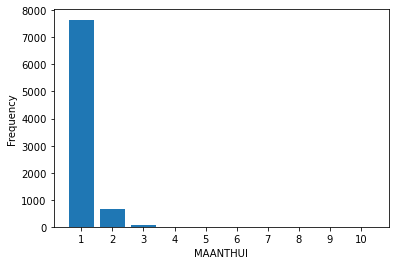

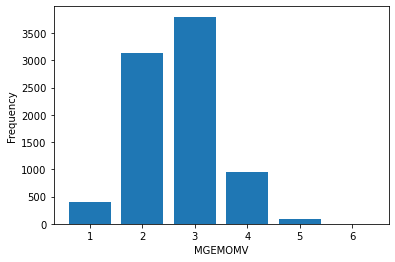

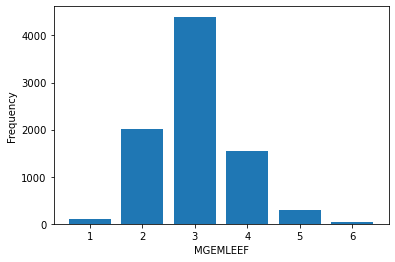

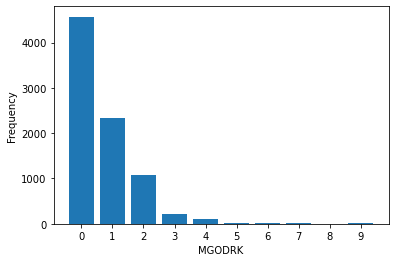

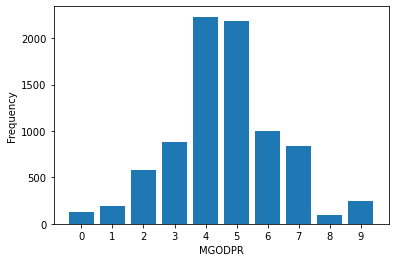

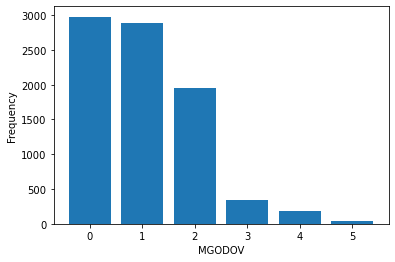

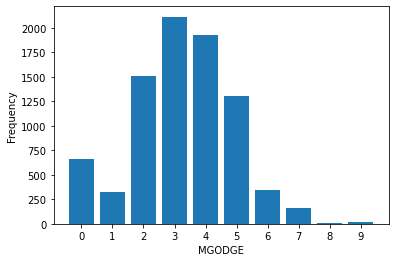

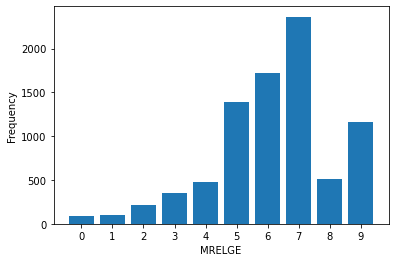

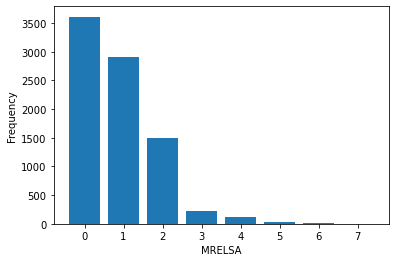

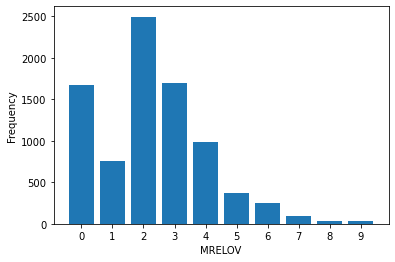

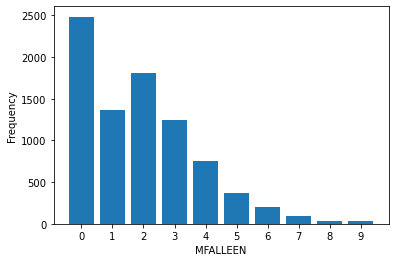

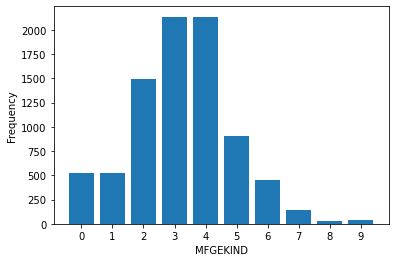

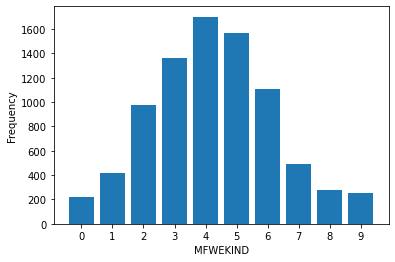

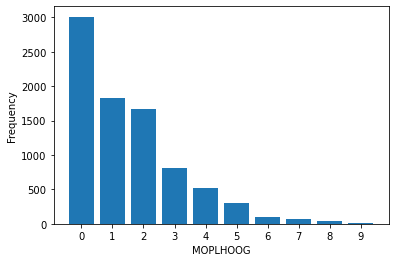

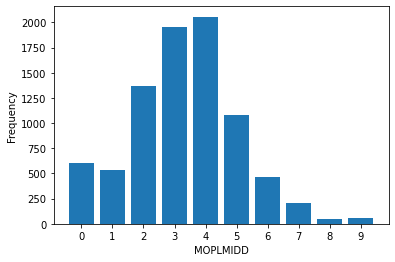

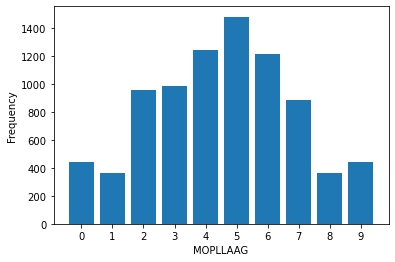

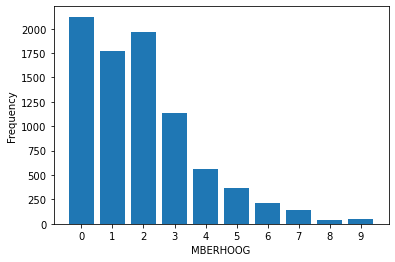

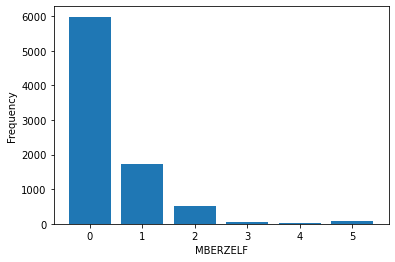

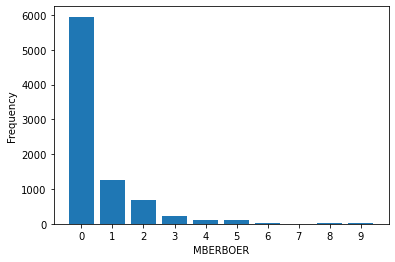

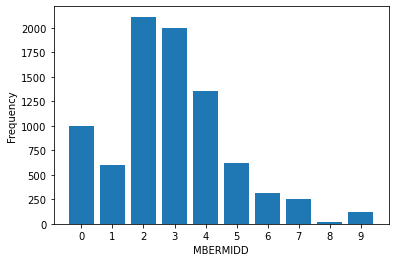

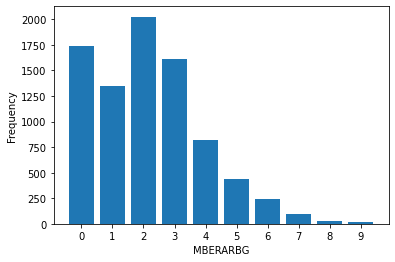

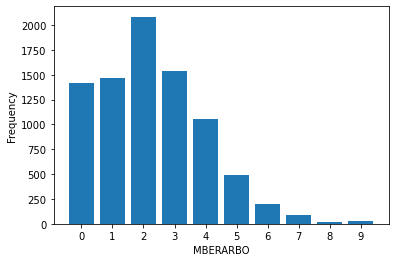

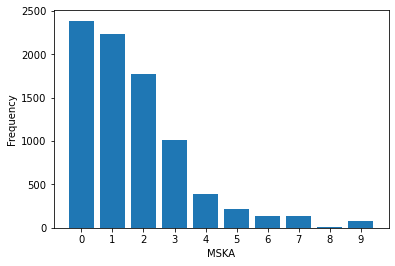

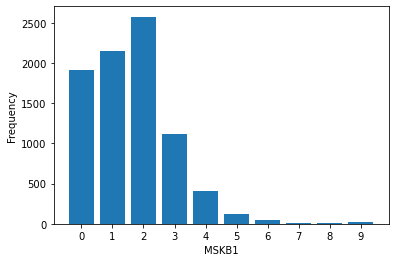

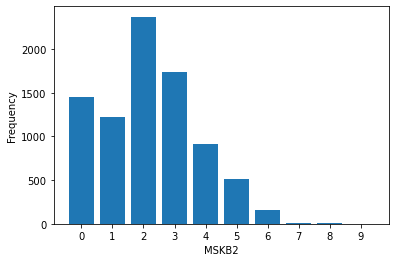

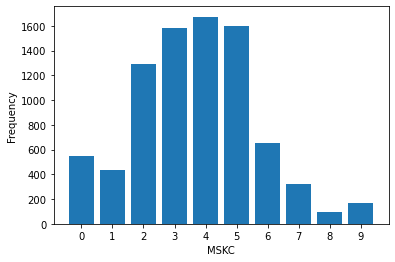

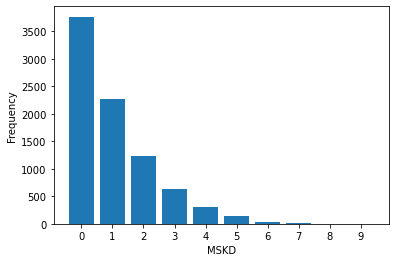

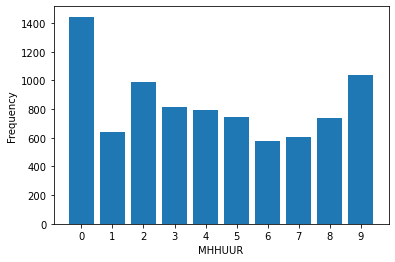

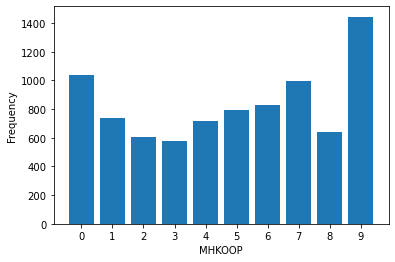

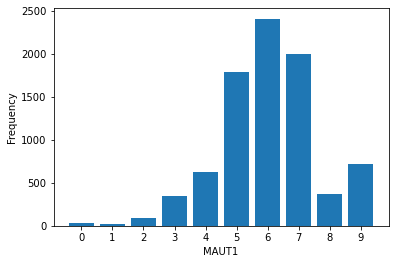

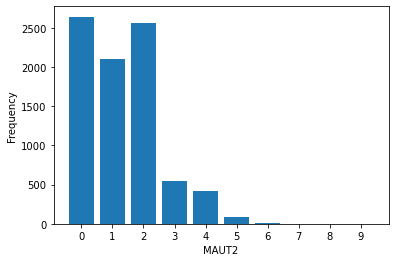

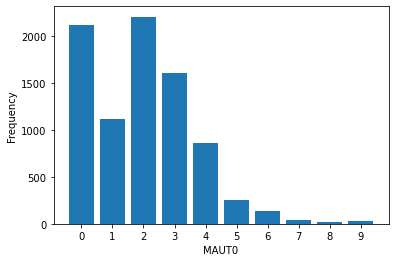

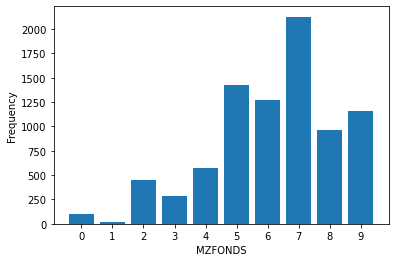

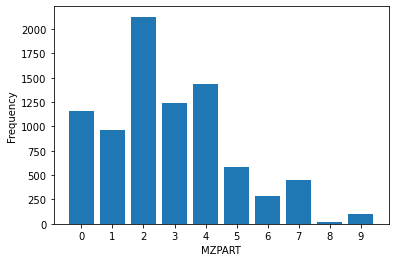

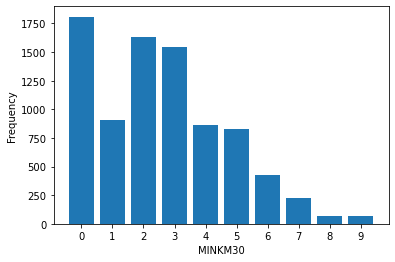

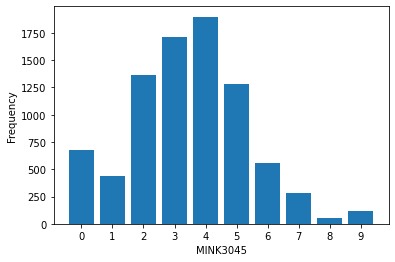

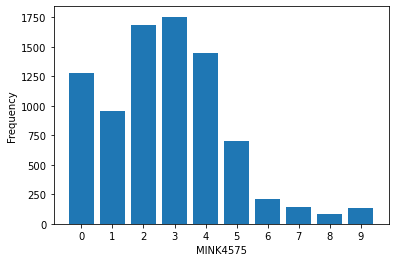

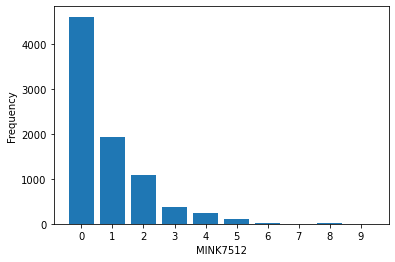

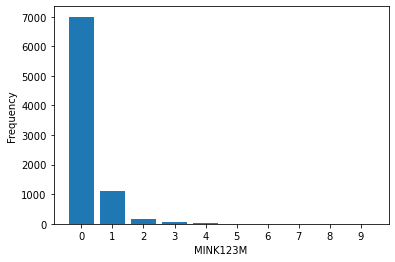

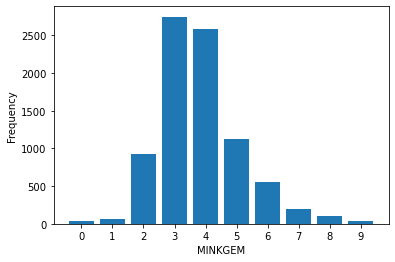

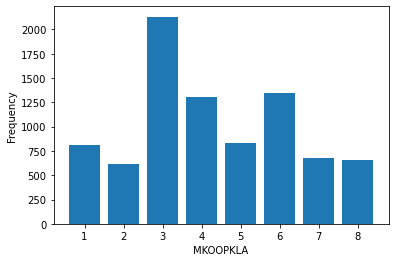

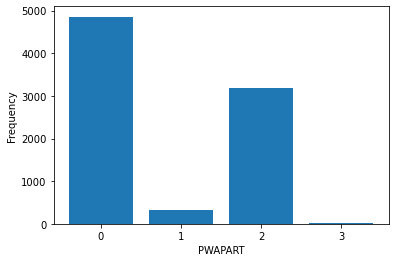

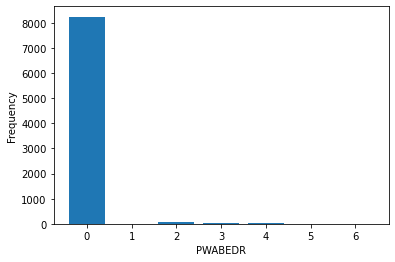

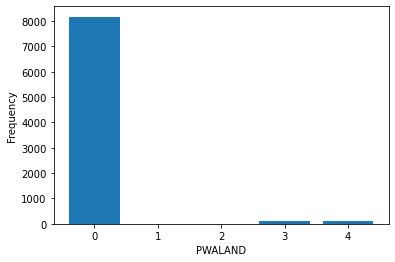

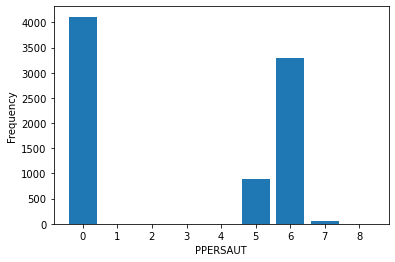

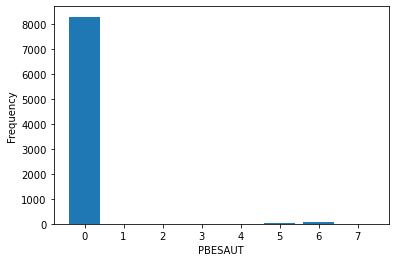

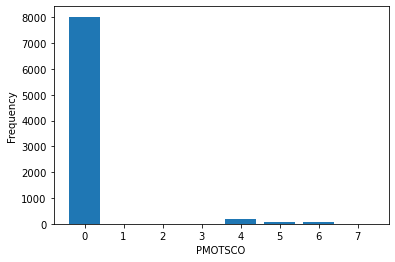

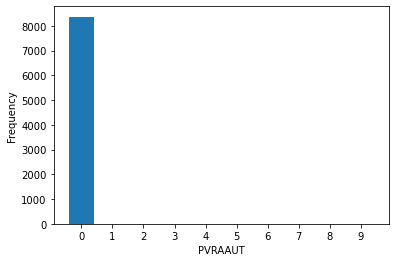

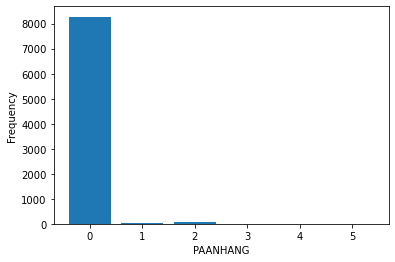

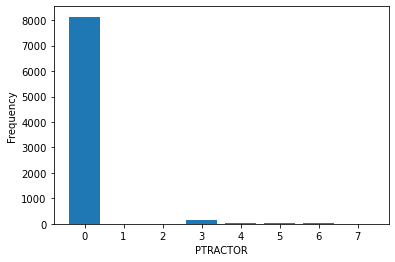

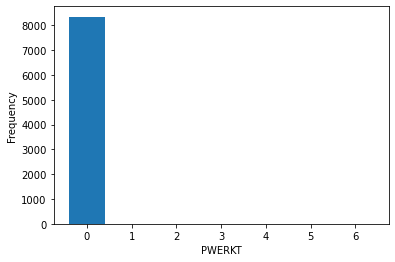

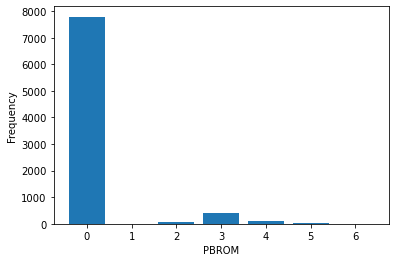

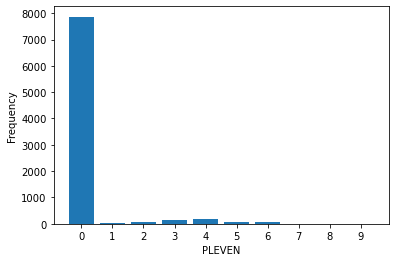

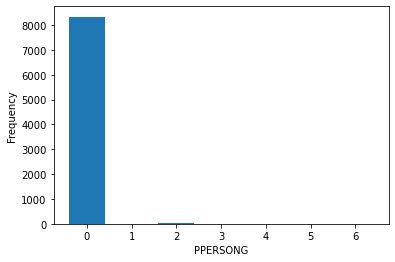

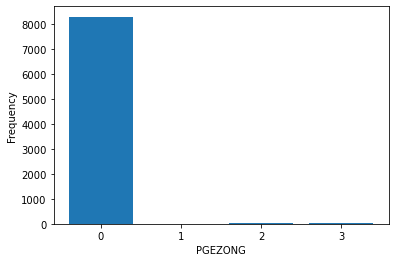

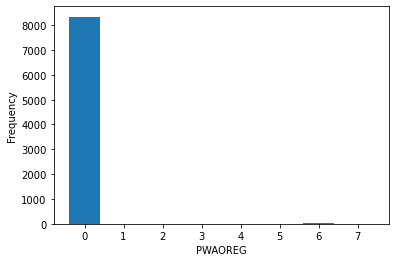

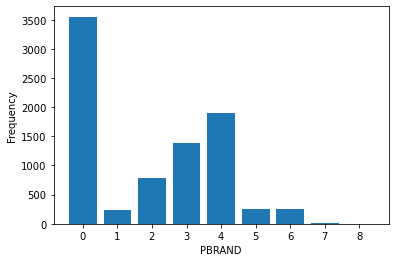

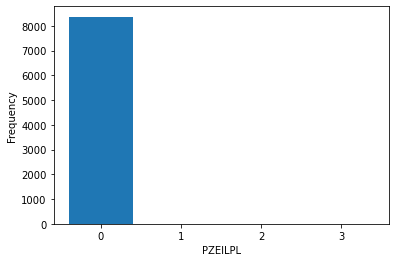

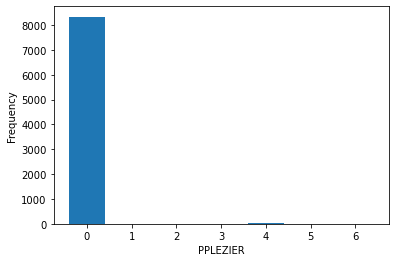

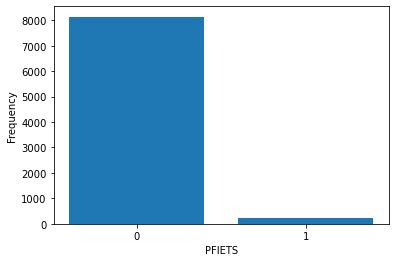

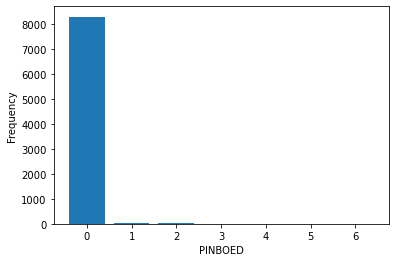

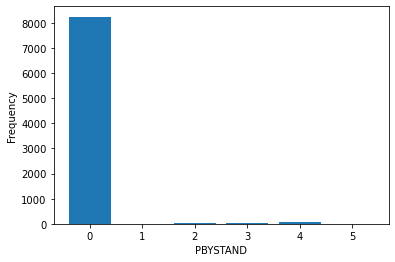

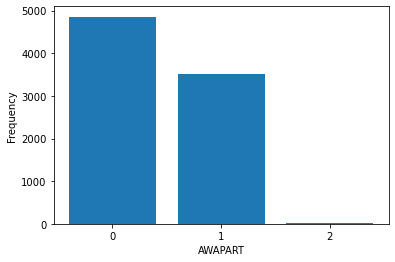

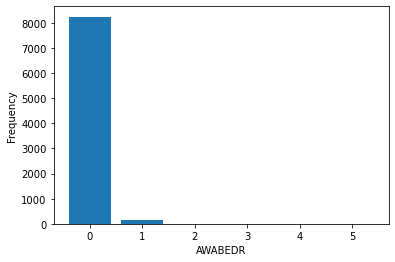

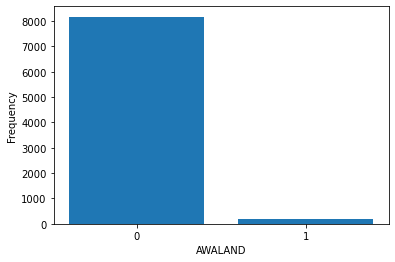

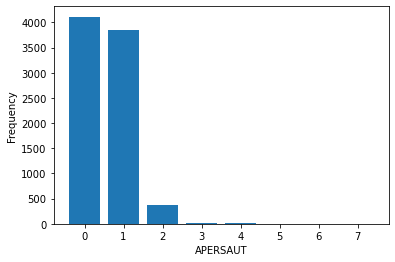

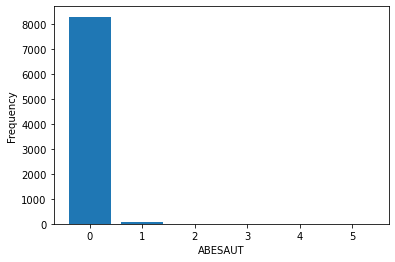

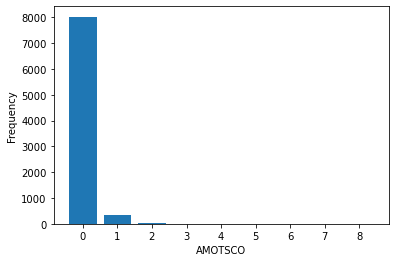

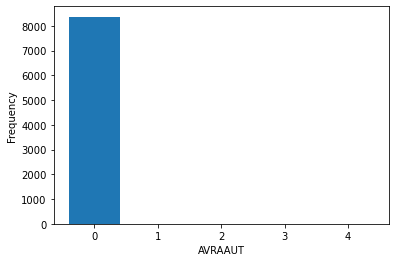

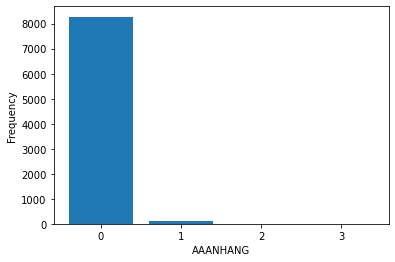

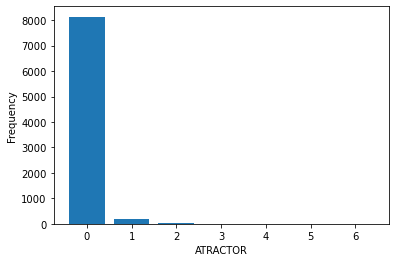

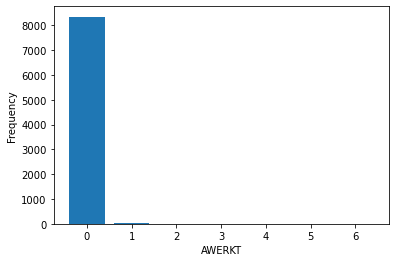

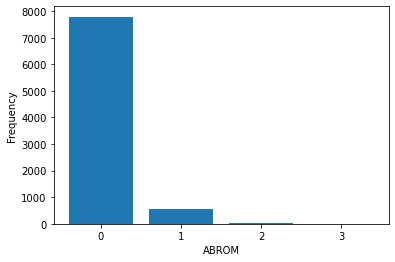

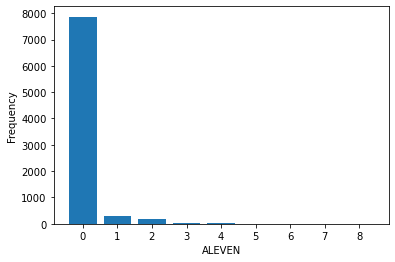

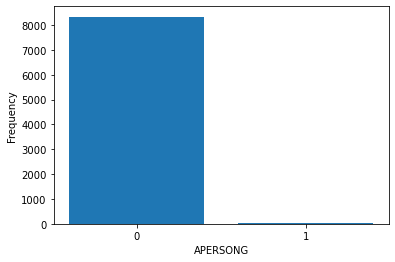

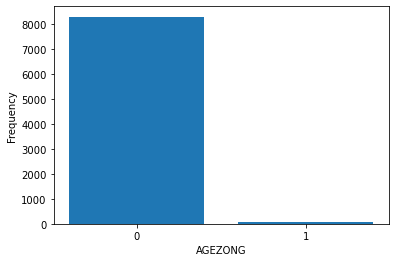

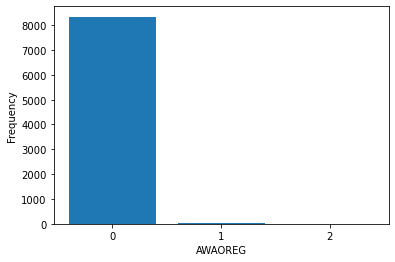

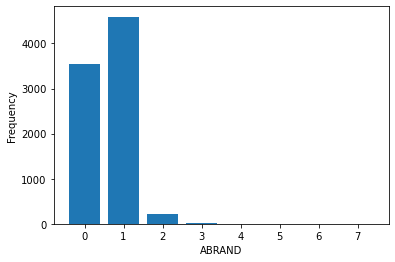

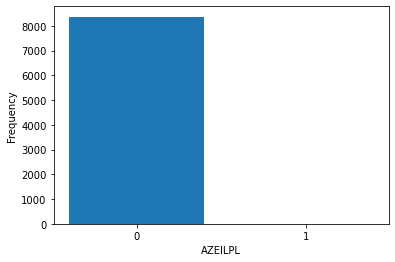

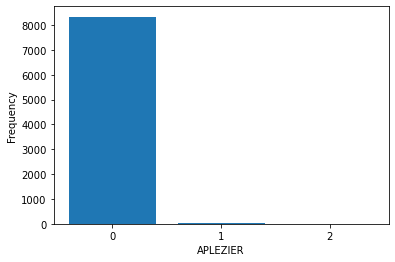

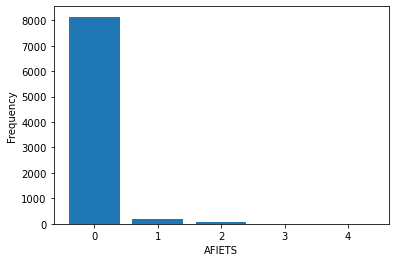

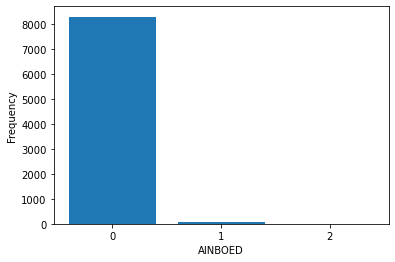

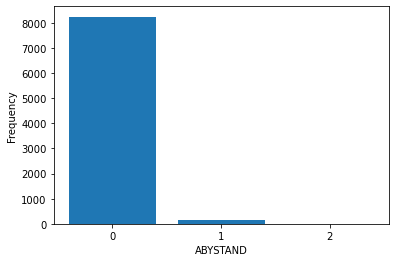

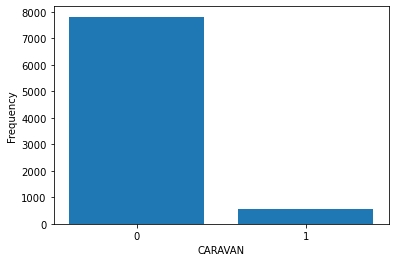

In [22]:
for col in ordinal:
    get_distribution(col)

One thing that is clear is that many variables have skewed distributions, with a small number of very high or very low values. So, we will group together rare values at the upper and lower tails of each distribution, which we view as outliers. At this stage, we want to be careful not to loose too much information--especially since there are so few Caravan-insurance owners in our data set, so we will be quite conservative about declaring a variable an outlier.

More specifically, for each ordinal variable, we find the minimum level such that at least 85 observations are contained in that level and below, and assign all smaller values of the variable with that minimum level. Below, we define functions which will carry out this process.





In [23]:
def trim_low(col_name, df, cutoff):
    # Function that groups together lowest values of a categorical variable.
    # Finds level `min_level` of an ordinal categorical variable such that 
    # at least `cutoff` many values are at or below that level.
    # Returns a series containing the original categorical variable
    # but with every value less than `min_level` replaced by `min_level`.
    
    counts = pd.DataFrame(df[col_name].value_counts().reset_index())
    counts.columns = ['level', col_name]
    counts = counts.sort_values('level', ascending=True)
    counts['cumulative'] = np.cumsum(counts[col_name])
    # More than `cutoff` observations are less than or equal to min_level
    min_level = min(counts.loc[counts['cumulative'] >= cutoff, 'level'])
    
    # All values of the variable less than min_level are replaced with min_level
    small_cats = [level for level in counts.level if level < min_level]
    fixed_col = df[col_name]
    if len(small_cats) > 0:
        fixed_col = fixed_col.replace(small_cats, min_level)
    return(fixed_col)

# Function that groups together highest observations

def trim_high(col_name, df, cutoff):
    # Function that groups together highest values of a categorical variable.
    # Finds level `max_level` of an ordinal categorical variable such that 
    # at least `cutoff` many values are at or above that level.
    # Returns a series containing the original categorical variable
    # but with every value greater than `max_level` replaced by `max_level`.
    
    counts = pd.DataFrame(df[col_name].value_counts().reset_index())
    counts.columns = ['level', col_name]
    counts = counts.sort_values('level', ascending=False)
    counts['cumulative'] = np.cumsum(counts[col_name])
    max_level =  max(counts.loc[counts['cumulative'] >= cutoff, 'level'])
    
    small_cats = [level for level in counts.level if level > max_level]
    fixed_col = df[col_name]
    if len(small_cats) > 0:
        fixed_col = fixed_col.replace(small_cats, max_level)
    return(fixed_col)

Next, we trim the highest and lowest observations as needed from each ordinal variables.

In [24]:
# Ensure our highest and lowest levels of each cateogrical variable have at least 85 observations
cutoff = 85

for col in ordinal:
    df[col] = trim_low(col, df, cutoff)
    df[col] = trim_high(col, df, cutoff)

Having trimmed "outliers," we now find that some ordinal variables have only one unique value! These variables must previously have had only one value with more than 85 features--that is, they must have been extremely low-variance to begin with. We drop these features now.

In [25]:
# Drop features which have only one value after trimming outliers
for col in ordinal:
    if len(df[col].unique()) == 1:
        df = df.drop(col, axis=1)

# Check how many rows and columns remain
df.shape

(8379, 70)

We now take a look at the distributions of our ordinal variables, to see how they have changed. We see that there are fewer very rare values, although some do remain.

In [26]:
ordinal = [col for col in df.columns if col not in nominal]

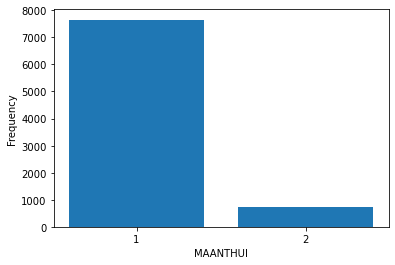

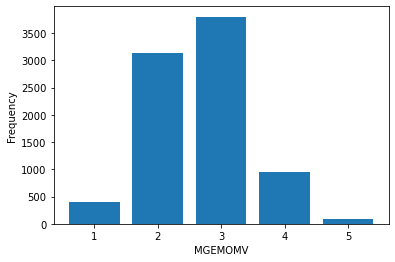

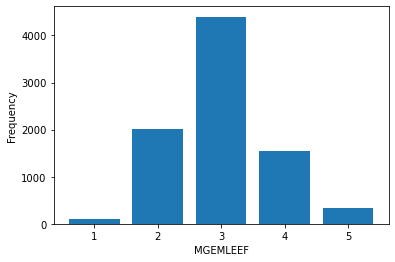

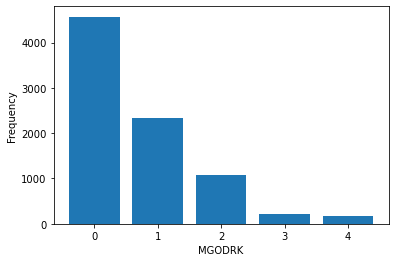

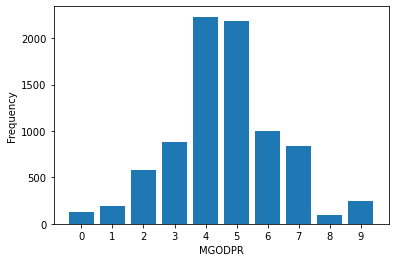

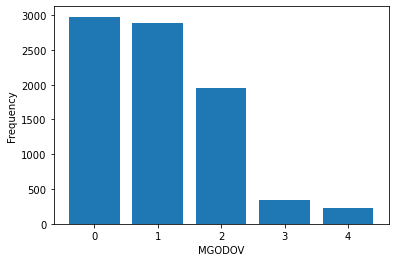

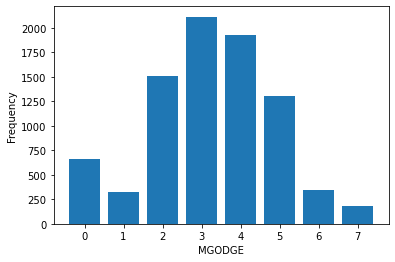

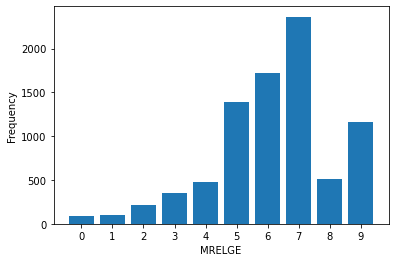

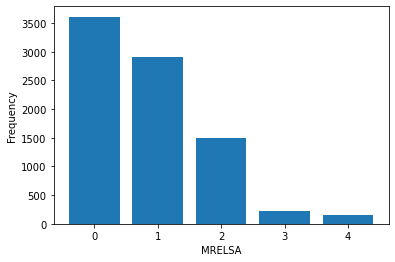

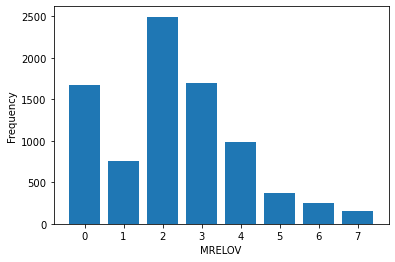

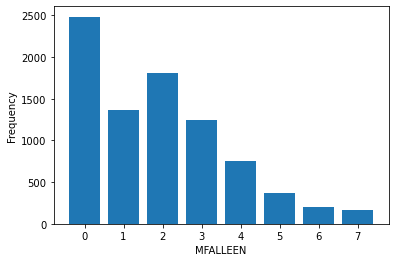

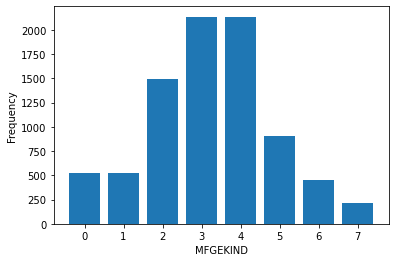

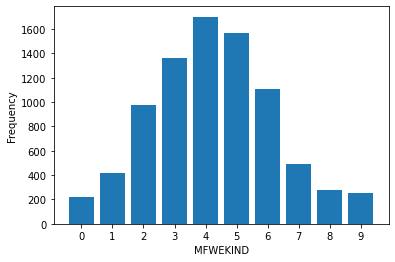

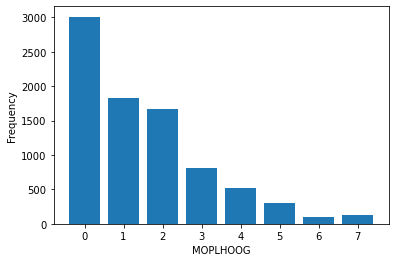

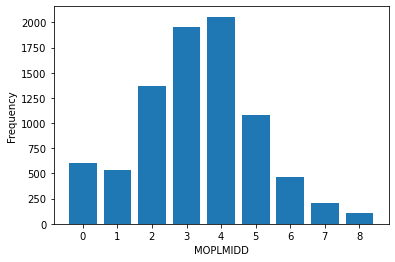

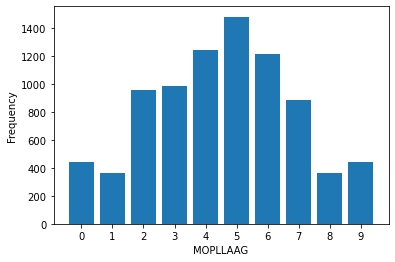

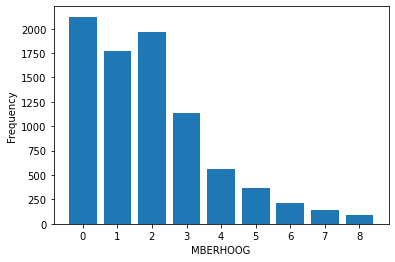

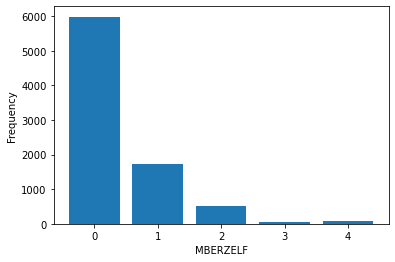

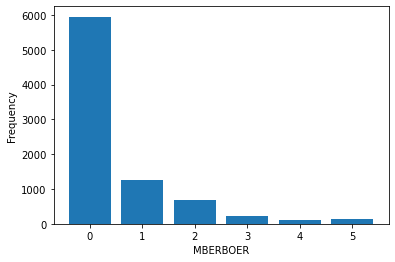

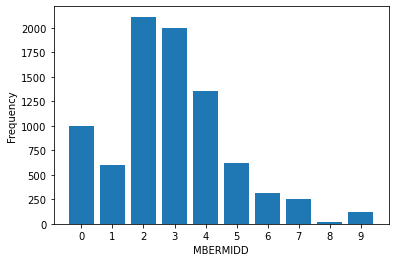

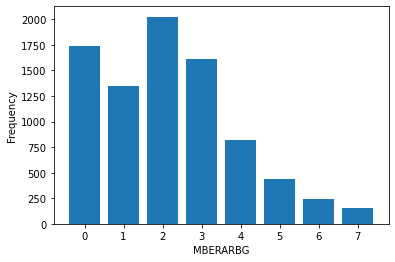

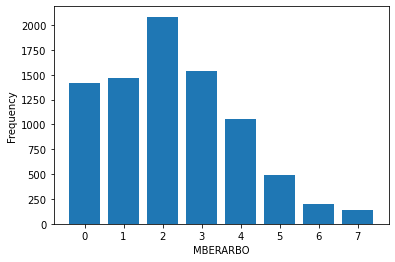

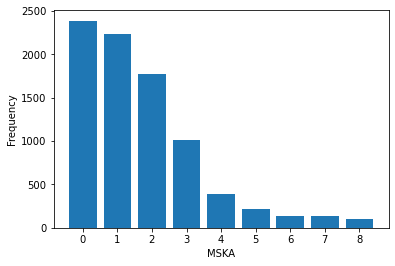

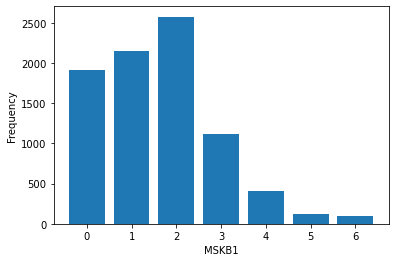

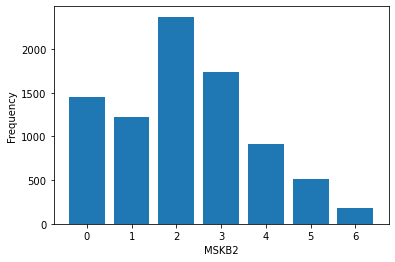

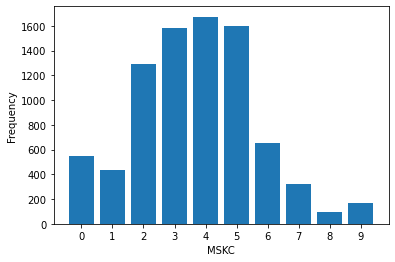

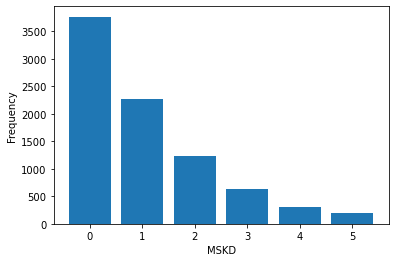

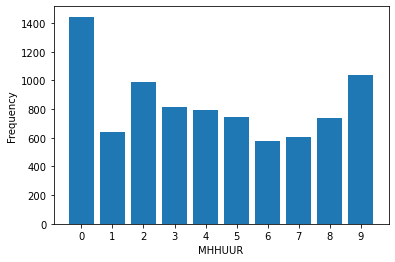

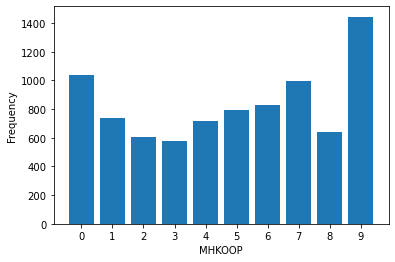

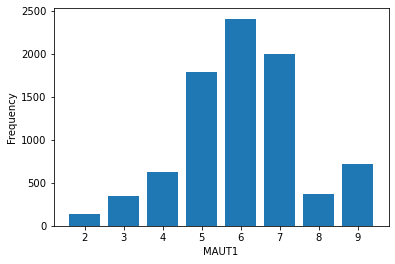

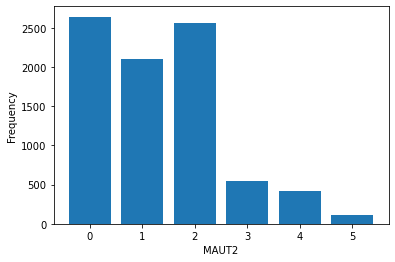

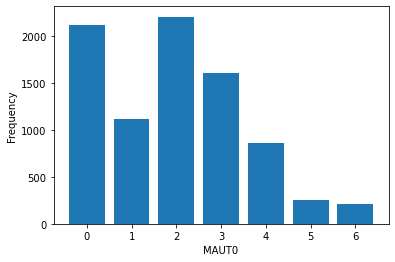

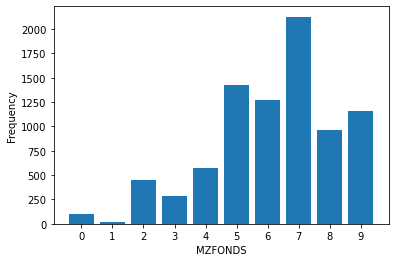

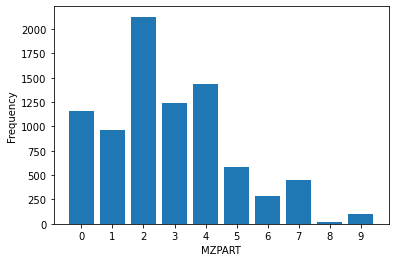

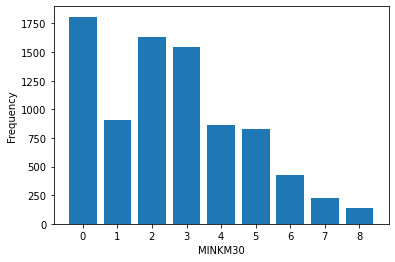

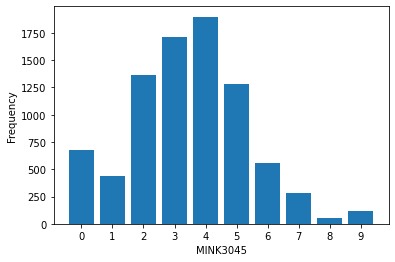

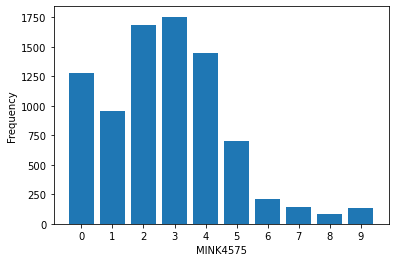

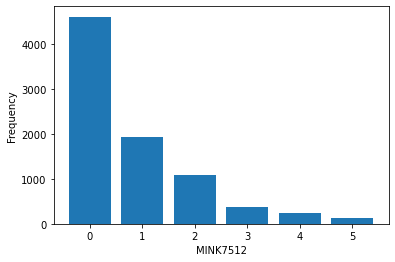

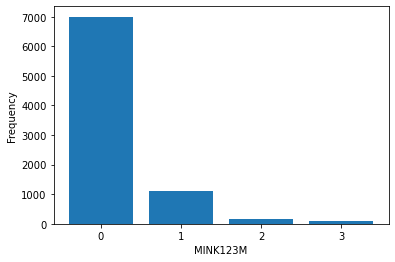

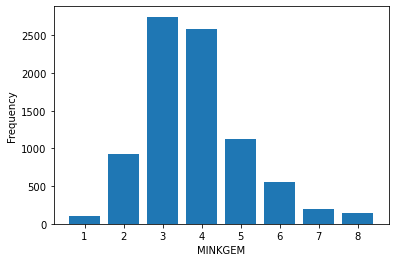

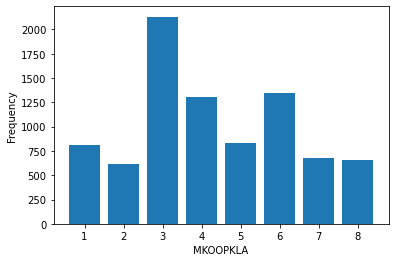

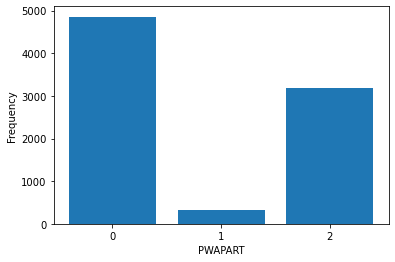

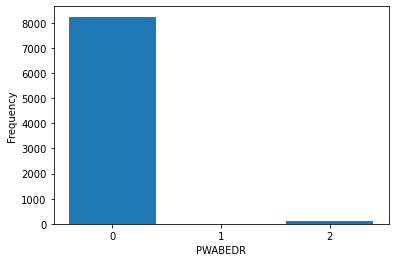

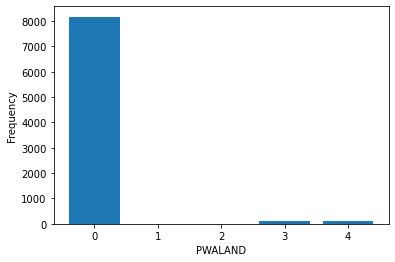

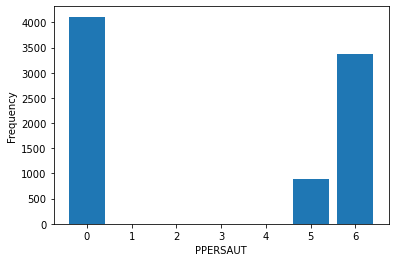

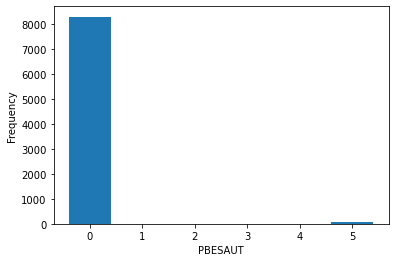

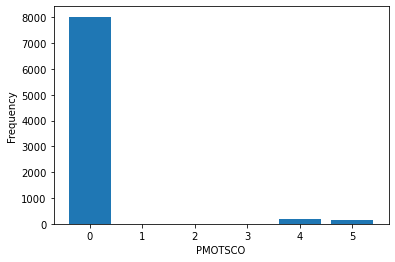

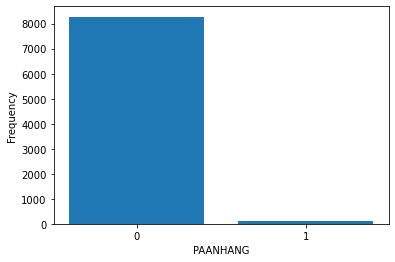

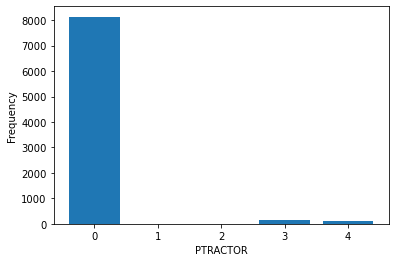

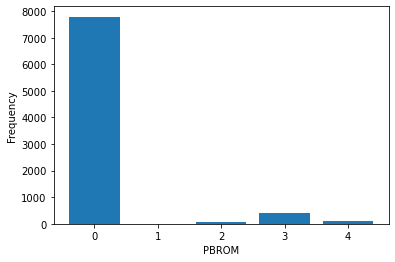

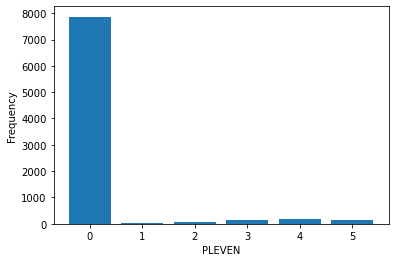

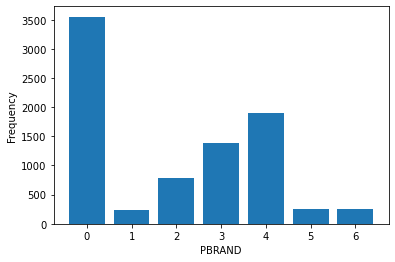

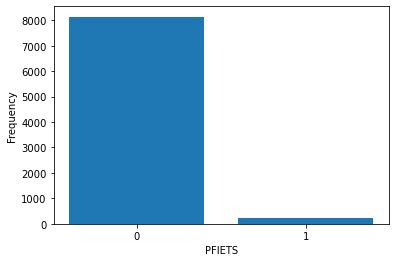

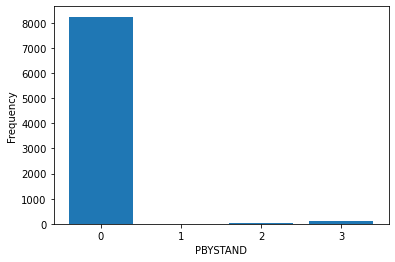

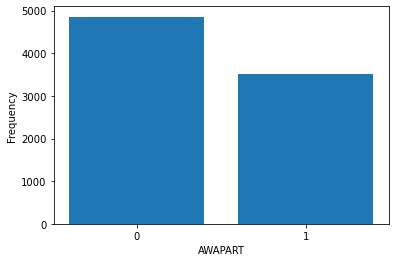

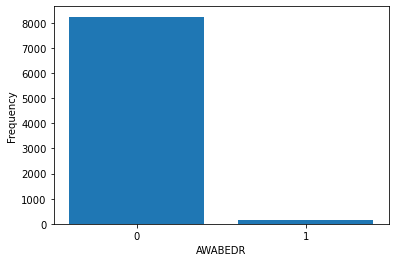

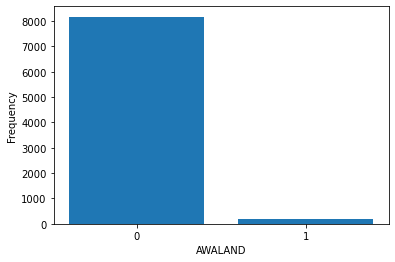

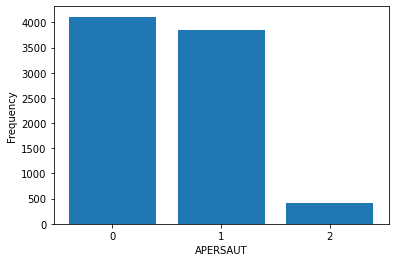

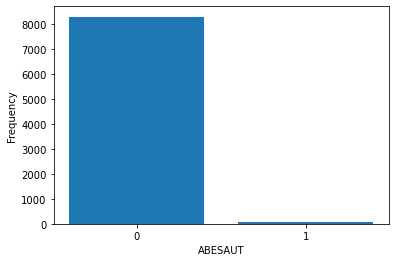

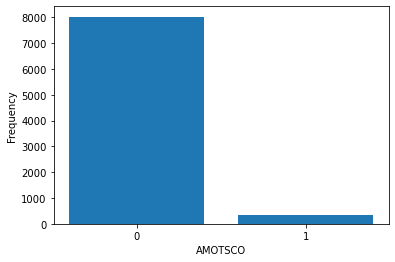

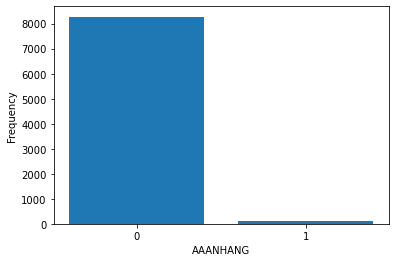

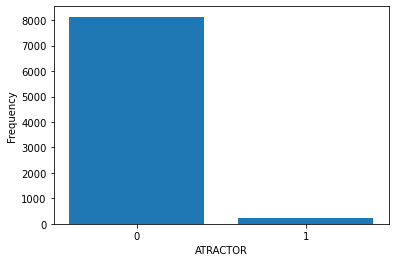

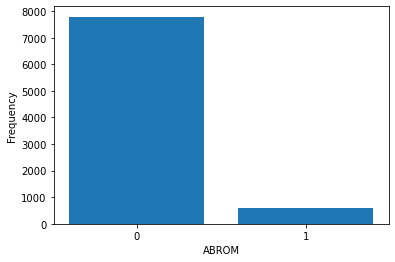

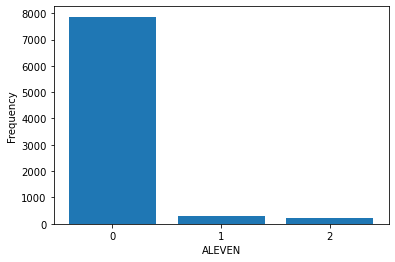

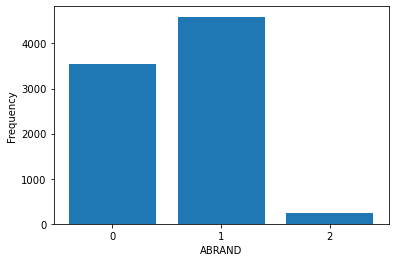

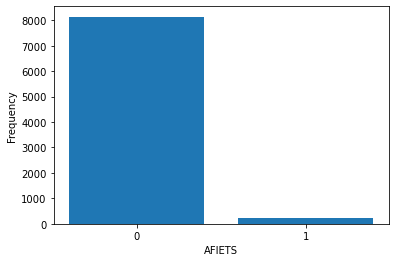

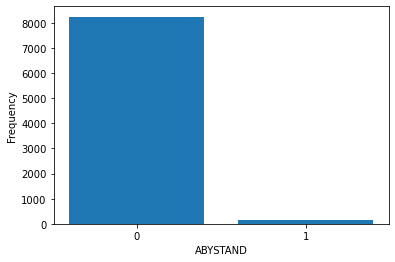

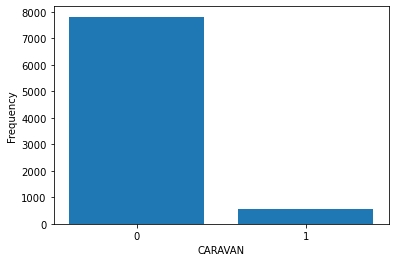

In [27]:
for col in ordinal:
    get_distribution(col)

## Exploratory Data Analysis

### Correlations between ordinal variables

Since most of our features are ordinal categorical variables, we will use Spearman's rank to compute correlations between them, and eliminate highly correlated features.

In [28]:
from scipy.stats import spearmanr

### Correlations between features and target

First, we create a data frame to record the correlation of each ordinal predictor with the target 'CARAVAN'.

In [49]:
#ordinal_features = ordinal
#ordinal_features.remove('CARAVAN')

# Create data from containing spearman correlation and pvalue
target_cor_results = [spearmanr(df[col], df['CARAVAN']) for col in ordinal]
target_cor_tuples = [(col, target_cor_results[idx][0], 
                      target_cor_results[idx][1]) for idx, col in enumerate(ordinal)]
target_cor_df = pd.DataFrame(columns = ['variable', 'cor', 'pval'], data = target_cor_tuples)

# Add a column for the absolute value of correlation, 
# which indicates strength of relationship.
# Sort our data frame by this column.
target_cor_df['abs_cor'] = target_cor_df.cor.abs()
tareget_cor_df = target_cor_df.sort_values('abs_cor', ascending=False)
tareget_cor_df.head()

KeyError: 'MGEMOMV'

In [34]:
# Save sorted list of features
sorted_vars = list(target_cor_df['variable'])

### Correlations between features

We create a matrix of correlations between features, and visualize the correlations witg a heatmap.

In [41]:
# Create matrix of correlations
features_cor_matrix = [[spearmanr(df[col1], df[col2])[0] for col2 in sorted_vars] for col1 in sorted_vars]

In [42]:
# For convenience, transform matrix to a data frame

features_cor_df = pd.DataFrame(columns=sorted_vars, data=feature_cor_matrix, index=sorted_vars)

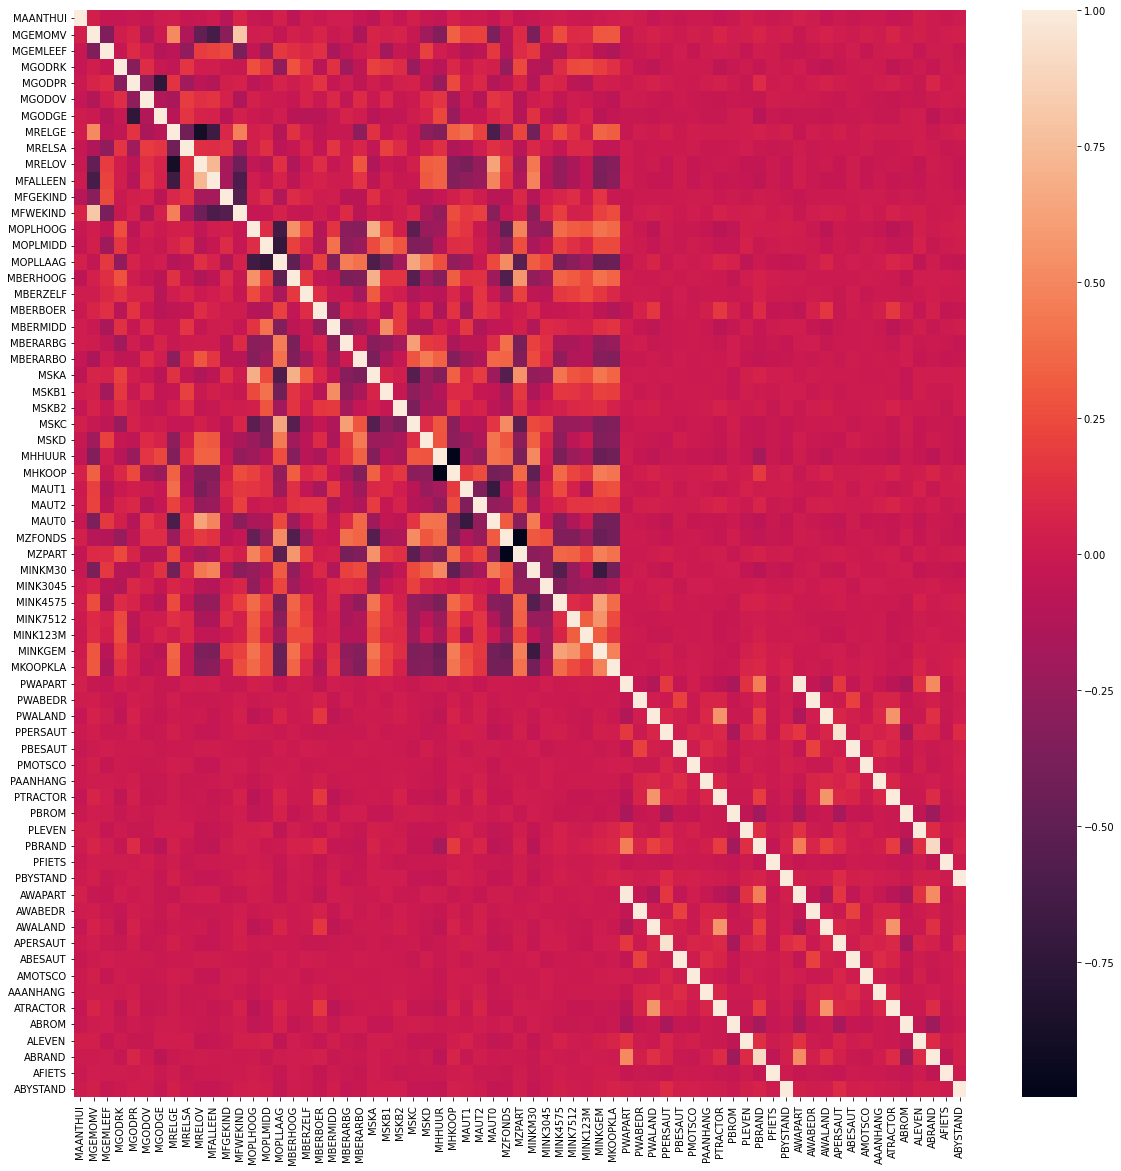

In [43]:
# Visualize the correlations with a heatmap

import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(features_cor_df)
plt.show()

We notice there are some very strong correlations. It is interesting that most correlations seem to occur in the upper-left quadrant, corresponding to features with a relatively strong relationship to our target.

### Removing highly correlated features

In [45]:
def find_correlated(var_list, correlations):
    correlated = []
    num_vars = len(var_list)
    for idx1 in range(len(var_list)-1):
        cors = [(features_cor_df.iloc[idx1, idx2]) for idx2 in range(idx1+1, num_vars)]
        if max(cors) >= 0.8:
            print(var_list[idx1], 'has a max absolute correlation of', round(max(np.abs(cors)), 4))
            correlated.append(var_list[idx1])
    return correlated

In [46]:
var_list = target_cor_df.columns.tolist()
var_list.reverse()
correlated_vars = find_correlated(sorted_vars, features_cor_df)

MGEMOMV has a max absolute correlation of 0.8079
PWAPART has a max absolute correlation of 0.9873
PWABEDR has a max absolute correlation of 1.0
PWALAND has a max absolute correlation of 0.9999
PPERSAUT has a max absolute correlation of 0.9475
PBESAUT has a max absolute correlation of 1.0
PMOTSCO has a max absolute correlation of 0.9998
PAANHANG has a max absolute correlation of 1.0
PTRACTOR has a max absolute correlation of 0.9999
PBROM has a max absolute correlation of 0.9994
PLEVEN has a max absolute correlation of 0.9989
PBRAND has a max absolute correlation of 0.8996
PFIETS has a max absolute correlation of 1.0
PBYSTAND has a max absolute correlation of 1.0


In [47]:
df = df.drop(correlated_vars, axis=1)

In [48]:
df.shape

(8379, 56)

### Distributions and Caravan ownership rates by category: nominal variables

In this section we visualize the distribution of each categorical variable, as well as the rates of Caravan ownership by category. We check the association between each variable and caravan ownership using the $ \chi $-squared test. However, since rates of Caravan ownership are very low, and some cells have very low expected frequencies, this should be taken with a grain of salt.

### Distributions and Caravan ownership rates by category: ordinal variables

In [ ]:
def visualize(col_name):
    
    counts = df[col_name].value_counts()
    freqs = df.groupby(col_name).CARAVAN.mean()

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figheight(5)
    fig.set_figwidth(20)

    ax1.bar(counts.index, counts)
    ax1.set_xticks(range(min(counts.index), max(counts.index)+1))
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Frequency')

    ax2.bar(freqs.index, freqs)
    ax2.set_xticks(range(min(counts.index), max(counts.index)+1))
    ax2.set_xlabel(col_name)
    ax2.set_ylabel('Caravan Ownership Rate')

    plt.show()

In [ ]:
for col in df.columns:
    visualize(col)